In [160]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib.lines as mlines

cd_path = f"./contrastive_decoding.csv" 
cd_best_path = f"./best_weights.csv"
cd_default_path = f"./default_weights.csv"
cd_df = pd.read_csv(cd_path)
cd_best_df = pd.read_csv(cd_best_path)
cd_default_df = pd.read_csv(cd_default_path)

In [161]:
# select tows with highest accuracy
groups = cd_df.sort_values(by="accuracy", ascending=False).groupby('dataset')
max_rows = groups['accuracy'].idxmax()
best_df = cd_df.loc[max_rows]
# save to csv
best_df.to_csv(f"best_weights.csv", index=False)

In [162]:
# convert to list
weight_list = best_df["weighting_parameter"].tolist()
weight_list = ' '.join(str(x) for x in weight_list)
data_list = best_df["dataset"].tolist()
data_list = ' '.join(str(x) for x in data_list)
print(data_list)
print(weight_list)

anli code_line_description conceptual_combinations copa cqa disambiguation_qa emoji_movie obqa piqa ruin_names temporal_sequences winogrande
-0.6045423508054584 -0.0480091550541323 -0.1125038429707516 -0.0474510904475165 -0.0331986456493744 -0.4651900658197523 -0.0925155461102666 -0.0866940645715281 -0.0427633155344719 -1.9612660842594056 -1.8932749097658392 -0.1272327002791391


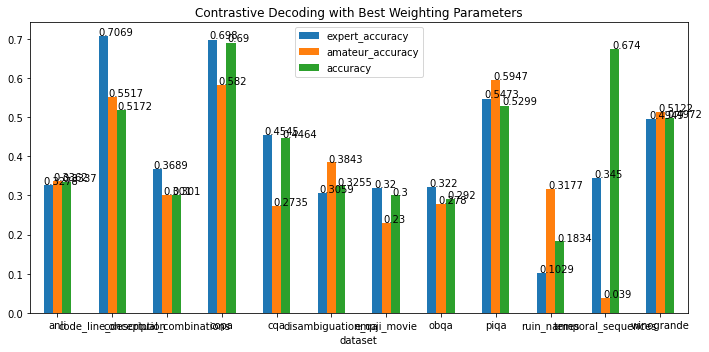

In [163]:
columns_to_keep = ["dataset", "weighting_parameter", "expert_accuracy", "amateur_accuracy", "accuracy"]
cd_best_df = cd_best_df[columns_to_keep]
# plot with bar
fig, ax = plt.subplots(figsize=(10, 5))
cd_best_df.plot.bar(x="dataset", 
                    y=["expert_accuracy", "amateur_accuracy", "accuracy"], 
                    ax=ax,
                    title="Contrastive Decoding with Best Weighting Parameters",
                    rot=0)
# add numbers to each bar
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))
plt.tight_layout()
plt.savefig("cd_best_weights.png", dpi=300)

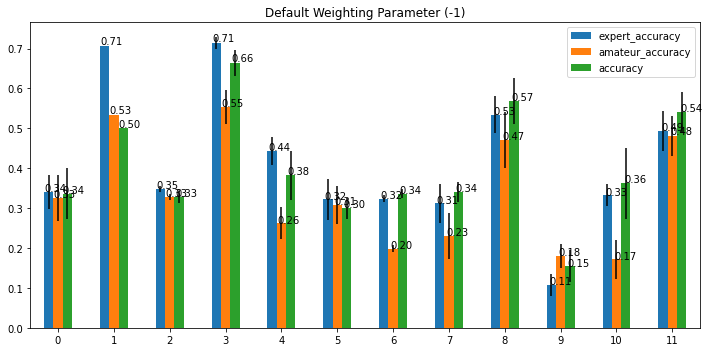

In [164]:
# only keep the foloowin
columns_to_keep = ["dataset", "weighting_parameter", "expert_accuracy", "amateur_accuracy", "accuracy", "seed"]
cd_default_df = cd_default_df[columns_to_keep]

# group by seed
groups = cd_default_df.groupby(['dataset'])[[ "weighting_parameter", "expert_accuracy", "amateur_accuracy", "accuracy"]]
# get the mean of each group
default_mean = groups.mean().reset_index()#.set_index("dataset")
default_std = groups.std().reset_index()#.set_index("dataset")

# plot with bar
fig, ax = plt.subplots(figsize=(10, 5))
default_mean.plot.bar(
                        # x="dataset",
                        y=["expert_accuracy", "amateur_accuracy", "accuracy"],
                        yerr=default_std,
                        ax=ax,
                        title="Default Weighting Parameter (-1)",
                        rot=0)
# add numbers to each bar, with at most 3 decimal places
for p in ax.patches:
    ax.annotate(f"{p.get_height():.2f}", (p.get_x() * 1.005, p.get_height() * 1.005))
plt.tight_layout()
plt.savefig("cd_default.png", dpi=300)

In [172]:
# prepare to write to latex
datasets="anli copa cqa obqa piqa winogrande code_line_description conceptual_combinations disambiguation_qa emoji_movie ruin_names temporal_sequences".split()
vis_df = cd_best_df.copy(deep=True)
vis_df["default_accuracy"] = default_mean["accuracy"]

vis_df['accuracy_diff'] = vis_df.apply(lambda row: f"{row['accuracy']*100:.1f}\\textsubscript{{{(row['accuracy'] - row['default_accuracy'])*100:.1f}}}", axis=1)

vis_df[['expert_accuracy', 'accuracy', 'default_accuracy']] = vis_df[['expert_accuracy', 'accuracy', 'default_accuracy']].applymap(lambda x: f"{x*100:.1f}")
vis_df = vis_df.drop(columns=["amateur_accuracy", "weighting_parameter", "accuracy"])
vis_df = vis_df.reindex(columns=["dataset", "expert_accuracy", "default_accuracy", "accuracy_diff"])

vis_df = vis_df.rename(columns={"dataset": "Dataset", 
                                "expert_accuracy": f"Acc\\textsubscript{{Expert}}", 
                                # "accuracy": f"Acc\\textsubscript{{Opt}}", 
                                "default_accuracy": f"Acc\\textsubscript{{Default}}",
                                "accuracy_diff": f"Acc\\textsubscript{{Optimal}}",
                                })

vis_df = vis_df.set_index("Dataset")
vis_df = vis_df.reindex(datasets)
vis_df = vis_df.rename(index={
                                "winogrande": "wg",
                              'code_line_description': 'cld',
                               'conceptual_combinations':'cc',
                               'disambiguation_qa':'dq',
                               'emoji_movie':'em',
                               'ruin_names':'rn',
                               'temporal_sequences':'ts',
                        })

vis_df.style.to_latex(
    buf="cd_weights.tex",
    column_format="lcccc",
    position="h",
    position_float="centering",
    label="tab:cd_weights",
    caption="Comparing default weights with optimal weights. wg stands for winogrande. The small number represents difference between optimal and default weights",
    multicol_align="c",
    multirow_align="c",
)

In [173]:
vis_df

,Acc\textsubscript{Expert},Acc\textsubscript{Default},Acc\textsubscript{Optimal}
Dataset,,,
anli,32.8,33.6,33.4\textsubscript{-0.2}
copa,69.8,66.4,69.0\textsubscript{2.6}
cqa,45.5,38.2,44.6\textsubscript{6.4}
obqa,32.2,34.0,29.2\textsubscript{-4.8}
piqa,54.7,56.8,53.0\textsubscript{-3.8}
wg,49.5,54.0,49.7\textsubscript{-4.3}
cld,70.7,50.0,51.7\textsubscript{1.7}
cc,36.9,32.8,30.1\textsubscript{-2.7}
dq,30.6,30.0,32.6\textsubscript{2.6}
